<a href="https://colab.research.google.com/github/nsmsm/ASL/blob/master/%EA%B3%BC%EC%A0%9C_2%EC%B0%A8_%EB%AC%B8%EC%8A%B9%EB%AA%85_(201985010061)_10_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST (or CIFAR10)를 분류하는 CNN 학습하기.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

## train_x : need for learning DNN
## ext_train_x : need for learning CNN
train_x = train_x/255.0
test_x = test_x/255.0

ext_train_x = train_x.reshape((60000, 28, 28, 1))
ext_test_x = test_x.reshape((10000, 28, 28, 1))

## show the dimensions of train_x and ext_train_x
print(train_x.shape)
print(ext_train_x.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)


In [3]:
## Define a DNN model and a CNN model
## set the number of params. of DNN and the number of params. of CNN to be similar

## DNN model
dnn_model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(110, activation='relu'),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax')]
)

## CNN model
cnn_model = models.Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2,2), padding='valid'),
  Conv2D(64, (3, 3), activation='relu'),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')
])

dnn_model.summary()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 110)               86350     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               11100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 98,460
Trainable params: 98,460
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
______________________________

In [4]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

dnn_hist=dnn_model.fit(train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)
cnn_hist=cnn_model.fit(ext_train_x, train_y, epochs=20, batch_size=100, validation_split=0.10)

Epoch 1/20
540/540 [==============================] - 1s 2ms/step - loss: 0.5439 - accuracy: 0.8101 - val_loss: 0.4197 - val_accuracy: 0.8535
Epoch 2/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3886 - accuracy: 0.8612 - val_loss: 0.3967 - val_accuracy: 0.8627
Epoch 3/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8751 - val_loss: 0.3371 - val_accuracy: 0.8773
Epoch 4/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3197 - accuracy: 0.8830 - val_loss: 0.3401 - val_accuracy: 0.8810
Epoch 5/20
540/540 [==============================] - 1s 2ms/step - loss: 0.3015 - accuracy: 0.8884 - val_loss: 0.3485 - val_accuracy: 0.8742
Epoch 6/20
540/540 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.8935 - val_loss: 0.3250 - val_accuracy: 0.8803
Epoch 7/20
540/540 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.8995 - val_loss: 0.3542 - val_accuracy: 0.8688
Epoch 

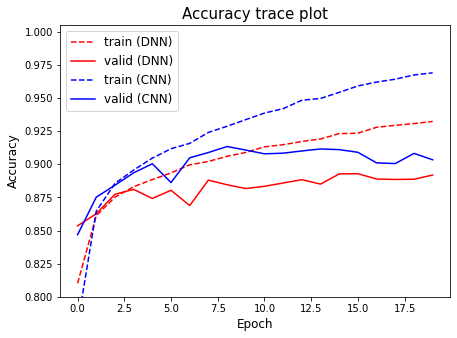

313/313 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.9064
Performance of DNN
...test accuracy: 0.888, test loss: 0.340
Performance of CNN
...test accuracy: 0.906, test loss: 0.344


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(dnn_hist.history['accuracy'], 'r--', label='train (DNN)')
plt.plot(dnn_hist.history['val_accuracy'], 'r-', label='valid (DNN)')
plt.plot(cnn_hist.history['accuracy'], 'b--', label='train (CNN)')
plt.plot(cnn_hist.history['val_accuracy'], 'b-', label='valid (CNN)')
plt.ylim([0.8,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

dnn_sc = dnn_model.evaluate(test_x, test_y)
cnn_sc = cnn_model.evaluate(ext_test_x, test_y)
print('Performance of DNN')
print('...test accuracy: %.3f, test loss: %.3f'%(dnn_sc[1], dnn_sc[0]))
print('Performance of CNN')
print('...test accuracy: %.3f, test loss: %.3f'%(cnn_sc[1], cnn_sc[0]))

전이학습 활용해보기. 

In [6]:
import keras
from keras.datasets import cifar10
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input

import numpy as np

In [7]:
## load cifar data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(y_train.shape)
y_train = np.squeeze(y_train)
print(y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 1)
(50000,)


(50000, 75, 75, 3)


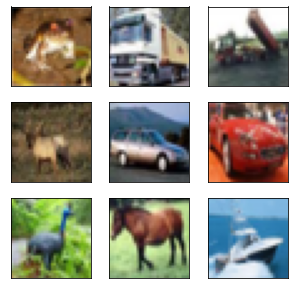

(10000, 75, 75, 3)


0

In [8]:
import tensorflow as tf
import gc
import matplotlib.pyplot as plt

## resize the cifar data
## from 32*32*3 to 75*75*3
train_images = tf.constant(x_train, dtype=tf.float32)
big_train_x = tf.image.resize(train_images, [75,75]).numpy()
print(big_train_x.shape)

## plot images
plt.figure(figsize=(5,5))
for col1 in range(9):
  plt.subplot(3,3,col1+1)
  plt.imshow(train_images[col1]/255.)
  plt.xticks([])
  plt.yticks([])
plt.show()

del x_train, train_images  ## delete the redundant variables
gc.collect()               ## free memory

test_images = tf.constant(x_test, dtype=tf.float32)
big_test_x = tf.image.resize(test_images, [75,75]).numpy()
print(big_test_x.shape)
del x_test, test_images
gc.collect()

In [9]:
## pre-process train and test data
big_train_x = preprocess_input(big_train_x)
big_test_x = preprocess_input(big_test_x)
print(big_train_x.shape)
print(big_train_x[0])

(50000, 75, 75, 3)
[[[-0.5372549  -0.5137255  -0.5058824 ]
  [-0.5548235  -0.5312941  -0.52564704]
  [-0.608366   -0.5848366  -0.58588237]
  ...
  [ 0.17856205 -0.02300656 -0.19660127]
  [ 0.16517651 -0.02635294 -0.19325489]
  [ 0.16078436 -0.02745098 -0.19215685]]

 [[-0.5844706  -0.5598432  -0.5530981 ]
  [-0.6020392  -0.57802665 -0.5731702 ]
  [-0.6555817  -0.6334431  -0.6343425 ]
  ...
  [ 0.14565754 -0.0667451  -0.25084442]
  [ 0.13555133 -0.06774902 -0.24468708]
  [ 0.13223529 -0.06807846 -0.24266666]]

 [[-0.728366   -0.7003922  -0.69699347]
  [-0.74593467 -0.7204497  -0.7180026 ]
  [-0.7994771  -0.78157735 -0.7820305 ]
  ...
  [ 0.0453769  -0.20004356 -0.41615683]
  [ 0.04526532 -0.19390851 -0.40143263]
  [ 0.04522872 -0.19189543 -0.39660132]]

 ...

 [[ 0.40156865  0.10718954 -0.17908484]
  [ 0.39293075  0.09009671 -0.22315276]
  [ 0.36660564  0.0380044  -0.35745507]
  ...
  [-0.12388647 -0.37902373 -0.5810716 ]
  [-0.19103765 -0.4337932  -0.59847295]
  [-0.21307158 -0.4517644

In [10]:
## load inceptionV3 model
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [11]:
## extract the penultimate features
## train data
train_features = model.predict(big_train_x)
print(train_features.shape)
train_features = np.squeeze(train_features)
print(train_features.shape)

## test data
test_features = model.predict(big_test_x)
print(test_features.shape)
test_features = np.squeeze(test_features)
print(test_features.shape)

del model, big_train_x, big_test_x
gc.collect()

(50000, 1, 1, 2048)
(50000, 2048)
(10000, 1, 1, 2048)
(10000, 2048)


14709

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


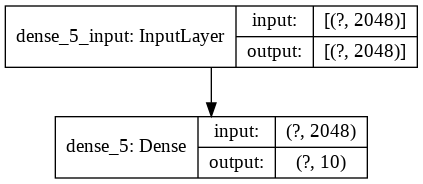

In [12]:
multi_logistic_model = models.Sequential([
  Dense(10, activation='softmax', input_shape=(2048,))]
)
multi_logistic_model.summary()

plot_model(multi_logistic_model, show_shapes=True)

In [13]:
multi_logistic_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=multi_logistic_model.fit(train_features, y_train, epochs=20, batch_size=100, validation_split=0.10)

Epoch 1/20
450/450 [==============================] - 1s 2ms/step - loss: 1.2867 - accuracy: 0.5624 - val_loss: 1.1053 - val_accuracy: 0.6274
Epoch 2/20
450/450 [==============================] - 1s 2ms/step - loss: 1.0325 - accuracy: 0.6476 - val_loss: 1.0672 - val_accuracy: 0.6350
Epoch 3/20
450/450 [==============================] - 1s 2ms/step - loss: 0.9791 - accuracy: 0.6678 - val_loss: 1.0647 - val_accuracy: 0.6344
Epoch 4/20
450/450 [==============================] - 1s 2ms/step - loss: 0.9462 - accuracy: 0.6749 - val_loss: 1.0699 - val_accuracy: 0.6356
Epoch 5/20
450/450 [==============================] - 1s 2ms/step - loss: 0.9215 - accuracy: 0.6837 - val_loss: 1.0625 - val_accuracy: 0.6452
Epoch 6/20
450/450 [==============================] - 1s 2ms/step - loss: 0.9055 - accuracy: 0.6887 - val_loss: 1.0731 - val_accuracy: 0.6398
Epoch 7/20
450/450 [==============================] - 1s 2ms/step - loss: 0.8929 - accuracy: 0.6904 - val_loss: 1.0828 - val_accuracy: 0.6408
Epoch 

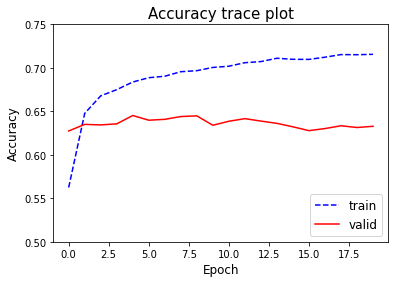

313/313 [==============================] - 1s 2ms/step - loss: 1.1218 - accuracy: 0.6394
...accuracy: 0.639, loss: 1.122


In [14]:
plt.plot(hist.history['accuracy'], 'b--', label='train')
plt.plot(hist.history['val_accuracy'], 'r-', label='valid')
plt.ylim([0.5,0.75])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = multi_logistic_model.evaluate(test_features, y_test)
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))